## Model Performance Evaluation

The most common evaluation metrics for regression are:
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Square Error (RMSE)

These metrics are applied to any regression task not just linear regression!

MAE : won't punish large errors however.

MSE : large error are punished more than with MAE, making MSE more popular.

    Issue with MSE:    
    * Different unit than y
    * It reports units of y squared! So it is realy hard to compare and interpret that.
RMSE : This is the root of the mean of the squred errors. Most popular and has same units as y. Large errors are punished more than with MAE.

**Important Question: What is a good value for RMSE?**

Context is everything!

The answer is related with the value of what you predict. For example: AA RMSE of $10 is fantastic for predicting the price of a house, but horrible for predicting the price of a candy bay!

Compare your error metric to the average value of the label in your data set to try get an intuition of its overall performance.

Domain knowledge also plays an important role here.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


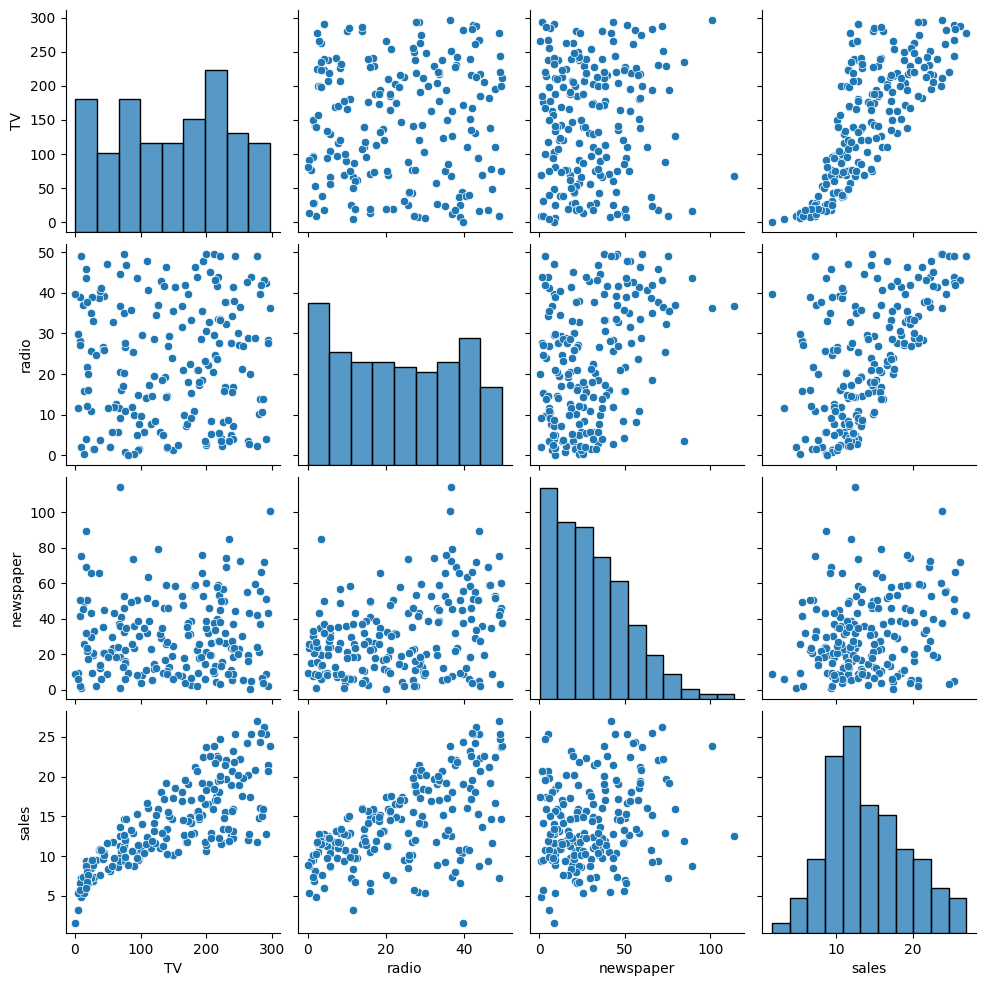

In [36]:
sns.pairplot(data=df);

In [37]:
X = df.drop(columns="sales")
y= df["sales"]

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()

In [42]:
model.fit(X_train, y_train)

LinearRegression()

In [43]:
test_predictions = model.predict(X_test)

In [44]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [46]:
df["sales"].mean()

14.022500000000003

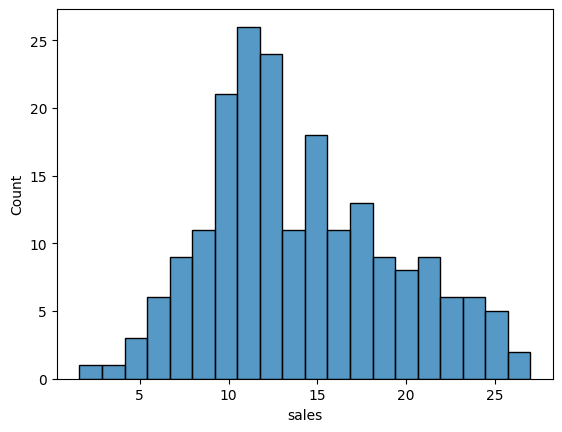

In [47]:
sns.histplot(data=df, x="sales", bins=20);

In [48]:
mean_absolute_error(y_test, test_predictions)

# when we compared the result with the mean of label, we can say that approximately %10 percent error we have.

1.2137457736144803

In [49]:
mean_squared_error(y_test, test_predictions) # we can't compare these result with the mean of label.

2.2987166978863773

In [50]:
np.sqrt(mean_squared_error(y_test, test_predictions))

# when we compared the result with the mean of label, we can say that approximately %10 percent error we have.
# It is acceptable. But it depends on the context.

1.5161519375993877

In [51]:
r2_score(y_test, test_predictions)

0.9185780903322446

## Residual Plots

It's also important to plot out residuals and check for normal distribution, this help us understand if linear Regression was a valid model choice.

In [53]:
test_residuals = y_test - test_predictions
test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

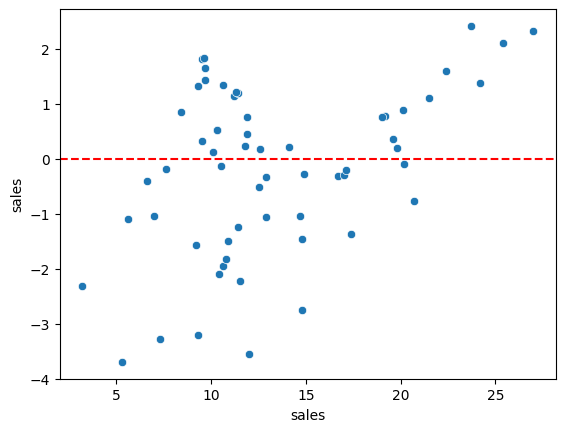

In [56]:
# typical residual plot
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color="r", ls="--");

# this plot shows us the linear model not suitable for our data.
# If the residuals were distributed around the zero line, we could say that the linear model was suitable for our data.

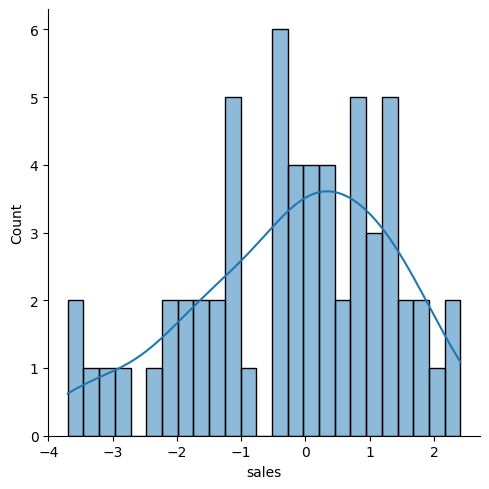

In [57]:
sns.displot(test_residuals, bins=25, kde=True);

Still unsure if normality is a reasonable approximation? We can check against the normal probability plot.

In [58]:
# sometimes these plots not enough to determine the normality of residuals.
# to fix this issue we use probability plot instead of these plots.

In [59]:
import scipy as sp

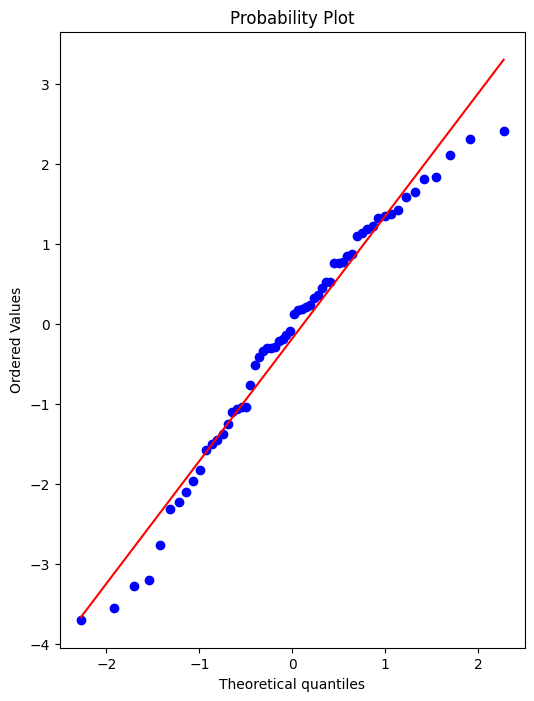

In [60]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize = (6,8), dpi=100)

# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residuals, plot=ax)

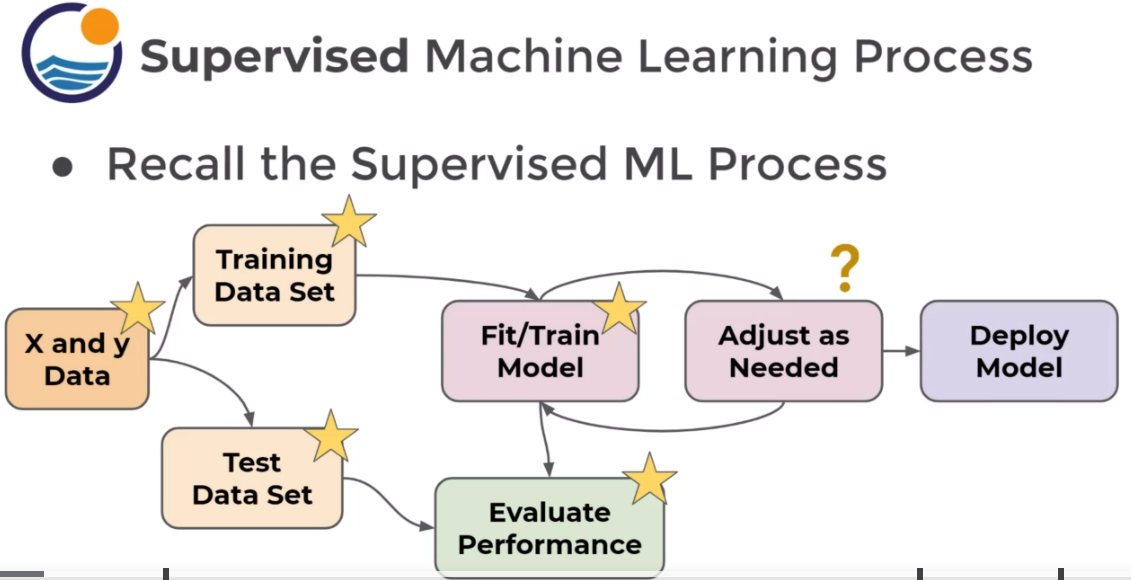

## Model Deployment and Coefficient Interpretation

### Retraining model on full data

If we're satisfied with the performance on the test data, before deploying our model to the real world, we should retrain on all our data. (If we were not satisfied, we could update parameters or choose another model)

In [62]:
final_model = LinearRegression() # create an empty model object with the same parameters that you use during model training

In [63]:
final_model.fit(X,y) # fit model with the full data

LinearRegression()

### Deployment, predictions and model attributes

#### Final model fit

Note, we can only do this since we only have 3 features, for any more it becomes unreasonable.

In [64]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [65]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [66]:
y_hat = final_model.predict(X)

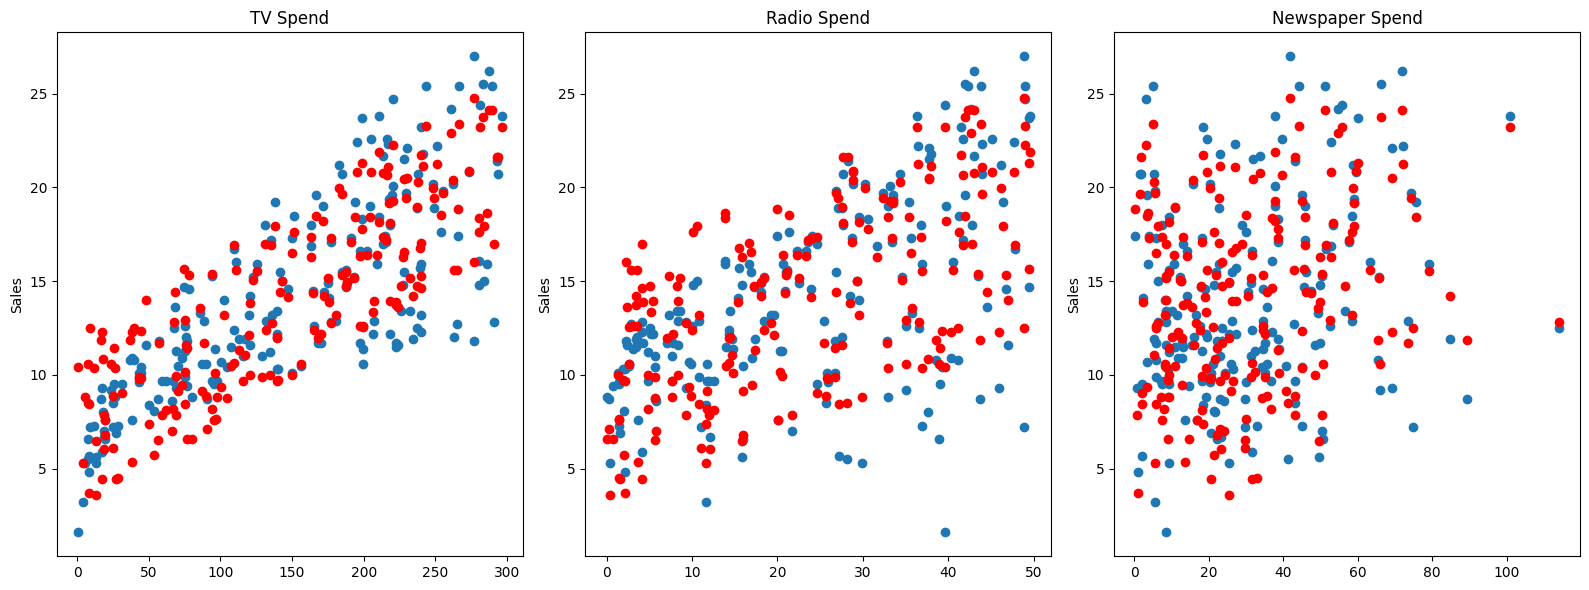

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df["TV"], df["sales"], "o")
axes[0].plot(df["TV"], y_hat, "o", color="red")
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df["radio"], df["sales"], "o")
axes[1].plot(df["radio"], y_hat, "o", color="red")
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df["newspaper"], df["sales"], "o")
axes[2].plot(df["newspaper"], y_hat, "o", color="red")
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper Spend")

plt.tight_layout();

#### Residuals

Should be normally distributed as discussed in the video.

In [74]:
residuals = y_hat -y

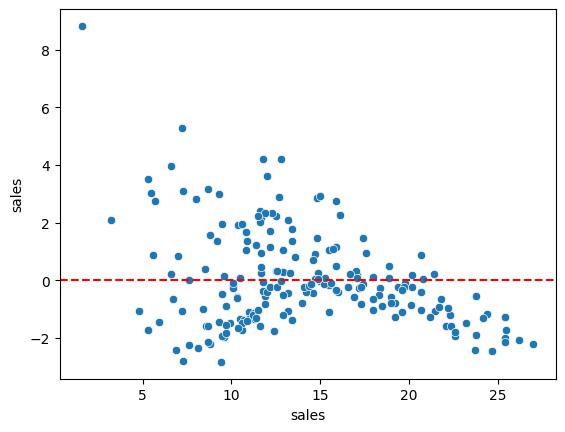

In [75]:
sns.scatterplot(x = y, y = residuals)
plt.axhline(y=0, color="r", linestyle = "--")

#### Coefficients

In [76]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [77]:
coeff_df = pd.DataFrame(final_model.coef_, X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


### Model persistence (saving and loading a model)

In [68]:
from joblib import dump,load

In [69]:
dump(final_model, "final_sales_model.joblib")

['final_sales_model.joblib']

In [70]:
loaded_model = load("final_sales_model.joblib")

In [71]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [72]:
# 149 TV, 22 Radio, 12 Newspaper
# Sales?
campaign = [[149, 22, 12]]

In [73]:
loaded_model.predict(campaign)

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])